In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
data1 = pd.read_csv('data/data1.txt')
data2 = pd.read_csv('data/data2.txt')
data3 = pd.read_csv('data/data3.txt')

In [9]:
# data.iloc[0] represent the first example on the dataset
# data.iloc[0].date get the date from the first example

# data.iloc[-1] represent the last example on the dataset
# data.iloc[0].date get the date from the last example

print("data1 is from ", data1.iloc[0].date, " to ", data1.iloc[-1].date)
print("data2 is from ", data2.iloc[0].date, " to ", data2.iloc[-1].date)
print("data3 is from ", data3.iloc[0].date, " to ", data3.iloc[-1].date)

data1 is from  2015-02-02 14:19:00  to  2015-02-04 10:43:00
data2 is from  2015-02-11 14:48:00  to  2015-02-18 09:19:00
data3 is from  2015-02-04 17:51:00  to  2015-02-10 09:33:00


In [11]:
data_all = pd.concat([data1, data2, data3])
print("data_all is from ", data_all.iloc[0].date, " to ", data_all.iloc[-1].date)

data_all is from  2015-02-02 14:19:00  to  2015-02-10 09:33:00


In [12]:
data_all['date'] = pd.to_datetime((data_all['date']))

data_all['Notte'] = 0.
data_all['Mattina'] = 0.
data_all['Mezzogiorno'] = 0.
data_all['Pomeriggio'] = 0.
data_all['Sera'] = 0.

data_all.loc[(data_all['date'].dt.hour < 8) | (data_all['date'].dt.hour > 21), 'Notte'] = 1.
data_all.loc[(data_all['date'].dt.hour <= 12) & (data_all['date'].dt.hour >= 8), 'Mattina'] = 1.
data_all.loc[(data_all['date'].dt.hour > 12) & (data_all['date'].dt.hour <= 15), 'Mezzogiorno'] = 1.
data_all.loc[(data_all['date'].dt.hour > 15) & (data_all['date'].dt.hour <= 18), 'Pomeriggio'] = 1.
data_all.loc[(data_all['date'].dt.hour > 18) & (data_all['date'].dt.hour <= 21), 'Sera'] = 1.

data_all.drop_duplicates(inplace=True)

data_all['Occupato'] = data_all['Occupancy']
del data_all['Occupancy']

data_all.set_index('date', inplace=True)

data_all.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Notte,Mattina,Mezzogiorno,Pomeriggio,Sera,Occupato
date,,,,,,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,0.0,0.0,1.0,0.0,0.0,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,0.0,0.0,1.0,0.0,0.0,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,0.0,0.0,1.0,0.0,0.0,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,0.0,0.0,1.0,0.0,0.0,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,0.0,0.0,1.0,0.0,0.0,1


In [13]:
print(type(data_all))

# creo un oggeto np array associato al dataset
dataset = data_all.values

print(type(dataset))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [14]:
split_point = int(len(dataset) * 0.95)

x_train = dataset[:split_point,:-1]
y_train = dataset[:split_point,-1]

x_test = dataset[split_point:,:-1]
y_test = dataset[split_point:,-1]

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [19]:
print("dataset originale:", x_train_std.shape)
print(x_test_std.shape)

dataset originale: (19532, 10)
(1028, 10)


In [21]:
def get_time_series(features, labels, steps_back):
    assert len(features) == len(labels)
    assert steps_back > 0
    ts_features = []
    ts_labels = []
    for i in range(steps_back, len(features) + 1 ):
        ts_features.append(features[i - steps_back:i])
        ts_labels.append(labels[i - 1])
    return np.asarray(ts_features), np.asarray(ts_labels)

steps_back = 60
x_train_ts, y_train_ts = get_time_series(x_train_std, y_train, steps_back)
x_test_ts, y_test_ts = get_time_series(x_test_std, y_test, steps_back)

In [22]:
print(x_train_ts.shape)
print(y_train_ts.shape)

(19473, 60, 10)
(19473,)


In [17]:
assert np.all(x_train_ts[0][0] == x_train_std[0])
assert y_train_ts[0] == y_train[steps_back]

assert np.all(x_train_ts[42][0] == x_train_std[42])
assert y_train_ts[42] == y_train[42 + steps_back]

assert np.all(x_test_ts[0][0] == x_test_std[0])
assert y_test_ts[0] == y_test[steps_back]

assert np.all(x_test_ts[42][0] == x_test_std[42])
assert y_test_ts[42] == y_test[42 + steps_back]

L'analisi dimensionale è la stessa fatto per il SimpleRNN

con la differenza principale con la LSTM abbiamo 5 nuovi blocchi:

1. Cell State
2. Gate di Input
3. Gate di Output
4. Gate di Forget
5. Gate di Update

tra questi, il Cell State è l'unico che non ha bisogno di paramentri perché fa solo somme e moltipicazioni tra valori "rozzi", tutti gli stati hanno una matrice di pesi associata, quindi con le LTSTM si hanno 4 volte il numero di parametri che si avevano con le RNN.

Con le RNN avevamo un numero di parametri pari alla somma di:
- numero parametri W(input) = (n°celle*n°features) 
- numero parametri W(ricorrent) =(n°celle x n°celle)
- numero prametri B = (n°celle x 1)

Con le LSTM tutto sarà moltiplicato per 4:
- numero parametri W(input) = 4 x (n°celle*n°features) 
- 4 x numero parametri W(ricorrent) = 4 x (n°celle x n°celle)
- numero prametri B = 4 x (n°celle x 1)


Nell'esempio sotto abbiamo 4 celle e 10 features, da cui:
- numero parametri W(input) = 4x(4x10) = 160
- 4 x numero parametri W(ricorrent) = 4x(4x4) = 64
- numero prametri B = 4x4 = 16

**Per un totale di** 240

A cui si sommano i 5 parametri della dense con un solo nodo (4 coefficienti + 1 bias)

**Totale** = 240 + 5 = 245



In [26]:
input = tf.keras.layers.Input(shape=x_train_ts.shape[1:])

rnn = tf.keras.layers.LSTM(units=4, dropout=0.5)(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(rnn)

model = tf.keras.models.Model(
    inputs=input,
    outputs=output,
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.BinaryAccuracy()
)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60, 10)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 4)                 240       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(
    x_train_ts,
    y_train_ts,
    batch_size=256,
    epochs=10,
    validation_data=(
        x_test_ts,
        y_test_ts
    ),
    verbose=2
)

Epoch 1/10
77/77 - 8s - loss: 0.1305 - binary_accuracy: 0.8619 - val_loss: 0.0855 - val_binary_accuracy: 0.8927 - 8s/epoch - 104ms/step
Epoch 2/10
77/77 - 2s - loss: 0.0475 - binary_accuracy: 0.9630 - val_loss: 0.0867 - val_binary_accuracy: 0.9040 - 2s/epoch - 32ms/step
Epoch 3/10
77/77 - 1s - loss: 0.0264 - binary_accuracy: 0.9749 - val_loss: 0.0542 - val_binary_accuracy: 0.9432 - 1s/epoch - 18ms/step
Epoch 4/10
77/77 - 1s - loss: 0.0217 - binary_accuracy: 0.9775 - val_loss: 0.0699 - val_binary_accuracy: 0.9236 - 1s/epoch - 18ms/step
Epoch 5/10
77/77 - 1s - loss: 0.0189 - binary_accuracy: 0.9806 - val_loss: 0.0637 - val_binary_accuracy: 0.9319 - 1s/epoch - 18ms/step
Epoch 6/10
77/77 - 1s - loss: 0.0179 - binary_accuracy: 0.9803 - val_loss: 0.0226 - val_binary_accuracy: 0.9701 - 1s/epoch - 18ms/step
Epoch 7/10
77/77 - 1s - loss: 0.0171 - binary_accuracy: 0.9812 - val_loss: 0.0271 - val_binary_accuracy: 0.9649 - 1s/epoch - 18ms/step
Epoch 8/10
77/77 - 2s - loss: 0.0169 - binary_accuracy

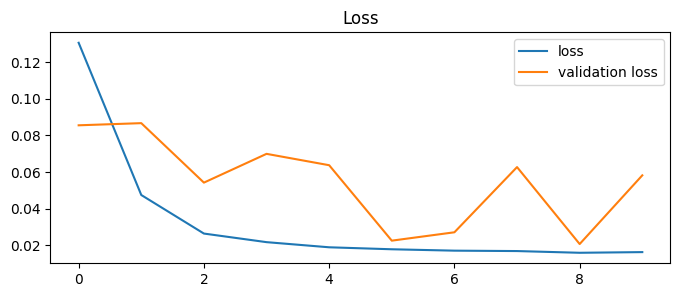

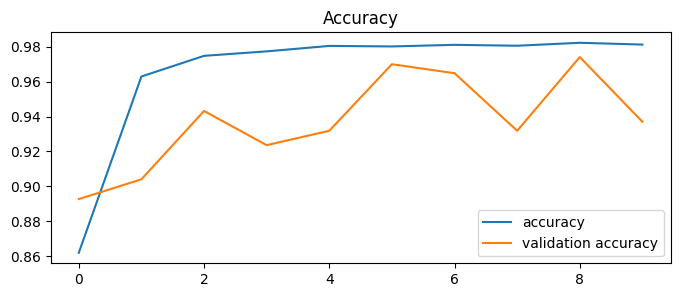

In [28]:
plt.figure(figsize=(8,3))
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,3))
plt.title('Accuracy')
plt.plot(history.history['binary_accuracy'], label='accuracy')
plt.plot(history.history['val_binary_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [29]:
print(
    model.predict(x_test_ts[42:43]),
    y_test_ts[42]
)

1/1 [==============================] - 0s 322ms/step
[[0.89520246]] 0.0


In [30]:
print(
    model.predict(x_test_ts[114:115]),
    y_test_ts[114]
)

1/1 [==============================] - 0s 28ms/step
[[0.0384404]] 0.0


In [31]:
preds = model.predict(x_test_ts)
preds = preds[:, 0]
preds[preds > 0.5] = 1
preds[preds < 1] = 0
print(accuracy_score(y_test_ts, preds))

31/31 [==============================] - 0s 3ms/step
0.9370485036119711
